In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import matplotlib.cbook
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

In [2]:
#importing data

# ERPs 
erp1,erp2,erp3,erp4,erp5,erp6 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig2/erp_pure_tone_all_roi.npy")
std_erp1,std_erp2,std_erp3,std_erp4,std_erp5,std_erp6 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig2/erp_std_pure_tone_all_roi.npy")

# mean ITPC 
area1,area2,area3,area4,area5,area6 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig2/mean_ITPC_pure_tone_all_roi.npy")

# mean ITPC spectrums 
mean_area1,mean_area2,mean_area3,mean_area4,mean_area5,mean_area6 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig2/spectrums_pure_tone_all_roi.npy")
std_mean_area1,std_mean_area2,std_mean_area3,std_mean_area4,std_mean_area5,std_mean_area6 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/fig2/spectrums_std_pure_tone_all_roi.npy")

In [3]:
# window of averaging

y = 68
x = 238
z = 8 
finish = x-y
window = np.round(np.logspace(*np.log10([finish+z, z]), num = 200),0)
areabis = np.zeros((200,334))
areabis[:,:] = np.nan
for i,j in enumerate(areabis):
        j[int(window[i]) + 68] = 1

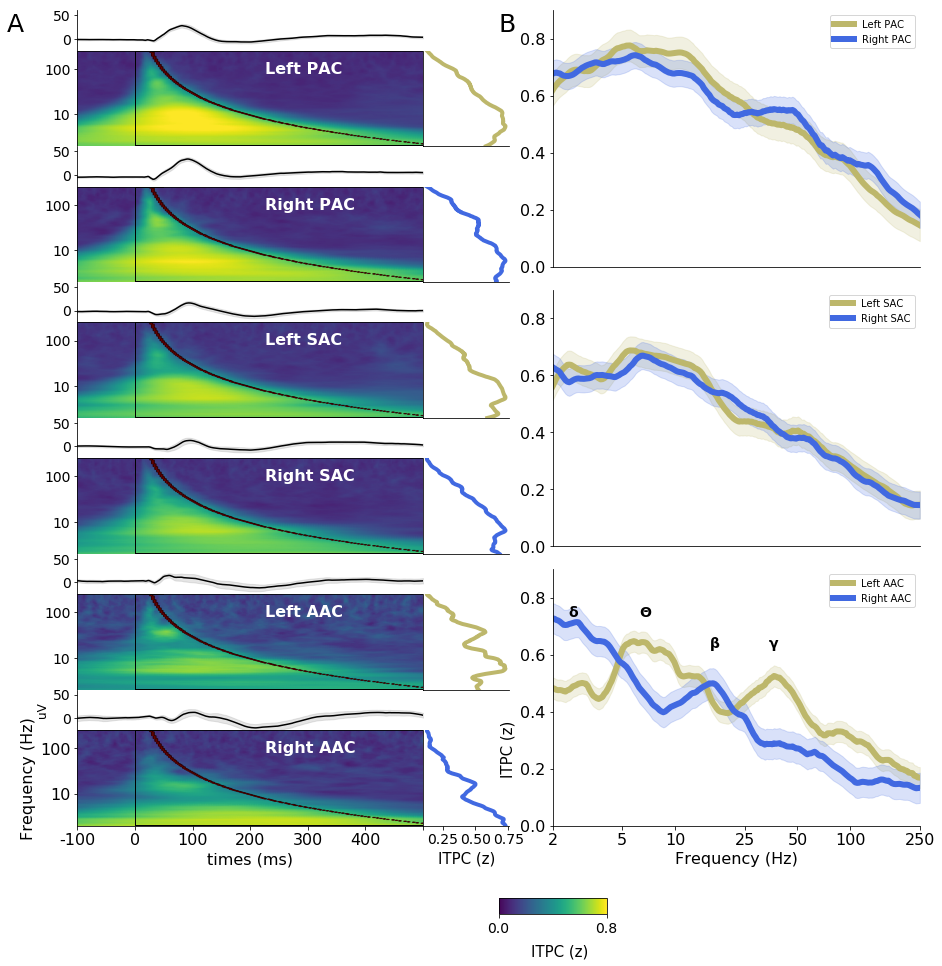

In [4]:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

vmax1 = 0.8
vmin1 = 0
nb_suj = [39,27,40,29,12,12]
freqs = np.logspace(*np.log10([2, 250]), num=200)
times = (np.arange(-0.2,0.8,0.003))
y = freqs
x = times * 1000
X,Y = np.meshgrid(x,y)
times1 = np.arange(-200,800.1,1)
names = ['Left PAC','Right PAC','Left SAC','Right SAC','Left AAC','Right AAC']
widths = [0.8,0.2]
heights = [0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116]
fig = plt.figure(figsize = (15,15))
gs1 = gridspec.GridSpec(12, 2,width_ratios = widths,height_ratios = heights)
gs1.update(left = 0.2, right = 0.25, wspace = 0, hspace = 0)

colors = np.tile(['darkkhaki','royalblue'],3)
ERPS = [gs1[0, :-1],gs1[2, :-1],gs1[4, :-1],gs1[6, :-1],gs1[8, :-1],gs1[10, :-1]]
ITPCs = [gs1[1, :-1],gs1[3, :-1],gs1[5, :-1], gs1[7, :-1],gs1[9, :-1],gs1[11, :-1]]
SPECs = [gs1[1,-1],gs1[3, -1],gs1[5, -1], gs1[7, -1],gs1[9, -1],gs1[11, -1] ]
AREAS = [area1,area2,area3,area4,area5,area6] 
PEs = [erp1,erp2,erp3,erp4,erp5,erp6]
STDPE = [std_erp1,std_erp2,std_erp3,std_erp4,std_erp5,std_erp6] 
MAR = [mean_area1,mean_area2,mean_area3,mean_area4,mean_area5,mean_area6]

# left part of the figure
for i in range(6):
    # plot ERP
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = ERPS[i],hspace = 0.0)
    ax = fig.add_subplot(gss[0])
    ax.plot(times1,PEs[i]*50,'k')
    ax.fill_between(times1,50*(PEs[i]-STDPE[i]/np.sqrt(nb_suj[i])),50*(PEs[i]+STDPE[i]/np.sqrt(nb_suj[i])),alpha = 0.2, edgecolor = 'grey', facecolor = 'grey') 
    ax.tick_params(labelbottom = 'off')  
    ax.set_xlim(-100,500)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(-25,60)
    plt.subplots_adjust(left = 0.2, right = 0.6, wspace = 0, hspace = 0.8)
    if i == 5:
        ax.set_ylabel('uV',fontsize = 12)
    plt.yticks(fontsize = 14)
    gs1.update(left = 0.2, right = 0.6, wspace = 0, hspace = 0)
    
    # plot ITPC
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = ITPCs[i],hspace = 0.0)
    ax = fig.add_subplot(gss[0])
    ir0 = ax.pcolormesh(X,Y,AREAS[i], cmap = plt.cm.viridis,vmax = vmax1,vmin = vmin1, shading = 'gouraud')
    ir = ax.pcolormesh(X,Y,areabis, cmap = plt.cm.jet,vmax = vmax1,vmin = vmin1, shading = 'gouraud')
    ax.set_yscale('log', basey = 10)
    ax.set_xlim(-100,500)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.minorticks_off() 
    ax.text(225,80,names[i],fontsize = 16,color = 'w',weight = 'bold')
    ax.get_xaxis().set_ticks([])
    plt.yticks(fontsize = 14)
    plt.vlines(0,0,250,linewidth = 1)
    plt.hlines(250,0,50,linewidth = 2)
    plt.hlines(2,0,500,linewidth = 2)
    if i == 5:
        ax.set_xlabel('times (ms)',fontsize = 16)
        ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
        ax.set_ylabel('Frequency (Hz)',fontsize = 16)
        plt.yticks(fontsize = 16)
        plt.xticks([-100,0,100,200,300,400,500],['-100','0','100','200','300','400',' '])
        plt.xticks(fontsize = 16)
    gs1.update(left = 0.2, right = 0.6, wspace = 0, hspace = 0.5)

    #plot spectrum
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = SPECs[i],hspace = 0.0)
    ax = fig.add_subplot(gss[0])
    ax.plot(MAR[i],freqs,linewidth = 4,color = colors[i])
    ax.set_yscale("log")
    ax.set_ylim(2,250)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i == 5:
        ax.set_xlabel('ITPC (z)', fontsize = 15)
        plt.gca().axes.get_xaxis().set_visible(True)
        plt.xticks(fontsize = 14)
    gs1.update(left = 0.2, right = 0.6, wspace = 0, hspace = 0)

# colorbar
cbaxes = fig.add_axes([0.59, 0.043, 0.1, 0.015]) 
cb = plt.colorbar(ir0, ticks = [0, 0.8],cax = cbaxes,orientation = "horizontal")  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# right part of the figure
gs2 = gridspec.GridSpec(12, 2)
gs2.update(left = 0.64, right = 0.98, hspace = 0.5)
idx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
idxs = [gs2[0:4,:],gs2[4:8,:],gs2[8:12,:]]

#plotting spectrum
for i in range(3):
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = idxs[i],hspace = 0.0)
    ax = fig.add_subplot(gss[0])
    itc = [MAR[idx[i][0]],MAR[idx[i][1]]]
    name = [names[idx[i][0]],names[idx[i][1]]]
    for line in range(2): 
        ax.plot(freqs,itc[line], linewidth = 6,label = name[line],color = colors[line])
        ax.fill_between(freqs,itc[line]-itc[line].std()/np.sqrt(nb_suj[4]),itc[line]+itc[line].std()/np.sqrt(nb_suj[4]),
           alpha = 0.2, edgecolor = colors[line], facecolor = colors[line]) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xscale("log")
    plt.xlim(2,250)
    plt.yticks(fontsize = 16)
    plt.ylim(0,0.9)
    ax.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.minorticks_off() 
    ax.get_xaxis().set_ticks([])
    plt.legend()
    if i == 2 :
        ax.set_ylabel('ITPC (z)', fontsize = 15)
        ax.yaxis.set_label_coords(-.1, 0.3)
        plt.xticks(fontsize = 16)
        ax.set_xlabel('Frequency (Hz)', fontsize=16)
        ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
        ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        ax.xaxis.set_minor_locator(ticker.NullLocator())
        tick_vals = np.array([2,5,10,25,50,100,250]).astype(int)
        ax.set_xticks(tick_vals)
        ax.tick_params(axis='x',labelsize = 16)
        plt.legend()

# numbers
fig.text(0.135,0.86,'A',fontsize=25)
fig.text(0.59,0.86,'B',fontsize=25)
fig.text(0.62,0.0045,'ITPC (z)',fontsize=15)

# frequencies symbols
fig.text(0.655, 0.319, u'\u03B4' ,weight='bold',  fontsize=14)
fig.text(0.72, 0.319, u'\u0398' ,weight='bold',  fontsize=14)
fig.text(0.786, 0.29,  u'\u03B2' , weight='bold', fontsize=14)
fig.text(0.84, 0.29,  u'\u03B3' ,weight='bold', fontsize=14);

In [5]:
import platform
import sys

print("CONFIGURATION:")
print('computer OS==' + platform.platform())
print('python==' + sys.version[0:22])
! pip freeze | grep pandas
! pip freeze | grep numpy

CONFIGURATION:
computer OS==Linux-4.15.0-72-generic-x86_64-with-debian-stretch-sid
python==2.7.15 |Anaconda, Inc.
geopandas==0.4.0
pandas==0.23.0
msgpack-numpy==0.4.4.2
numpy==1.14.3
numpydoc==0.8.0
